

## Step 1: Reading the data

1. Go to [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)
2. If you scroll down the page a bit, you'll see a data dictionary explaining each of the columns. Take a minute to familiarize yourself with how the csv is structured.
4. Download the `train.csv` file into this lab folder.
3. Create an iPython notebook and load the csv into pandas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic= pd.read_csv('train.csv')

In [3]:
titanic.head()
#titanic.dtypes
#titanic.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 2: Cleaning the data
1. Create a bar chart showing how many missing values are in each column
  - *Bonus* : Theres a good library for visualizing missing values called Missingno.
      - [Install Instructions](https://pypi.org/project/missingno/)
      - [Usage Documentation](https://github.com/ResidentMario/missingno)
2. Which column has the most `NaN` values? How many cells in that column are empty?
3. Delete all rows where `Embarked` is empty
4. Fill all empty cabins with **¯\\_(ツ)_/¯**

Note: `NaN`, empty, and missing are synonymous.

In [4]:
#finding null values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#creating new variable for missing values
missing_vals = titanic.isnull().sum()

In [6]:
#checking my work
missing_vals

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#creating new dataframe
missing_vals= pd.DataFrame(data=missing_vals)

In [8]:
#reseting the index
missing_vals = missing_vals.reset_index()

In [9]:
#sanity check
missing_vals.columns

Index(['index', 0], dtype='object')

In [10]:
#renaming my columns
new_columns_list = ['category','count_missing']
missing_vals.columns = new_columns_list

In [11]:
#checking my work
missing_vals

,category,count_missing
0,PassengerId,0
1,Survived,0
2,Pclass,0
3,Name,0
4,Sex,0
5,Age,177
6,SibSp,0
7,Parch,0
8,Ticket,0
9,Fare,0


## Step 2: Answer 1
1. Create a bar chart showing how many missing values are in each column

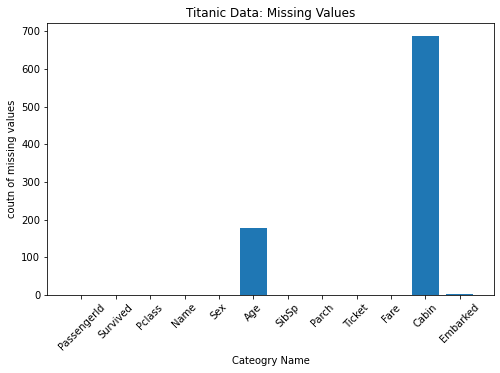

In [12]:
#adapted from 2.03-lesson-data-visualization

plt.figure(figsize=(8,5))

plt.title('Titanic Data: Missing Values')

plt.ylabel('coutn of missing values')
plt.xlabel('Cateogry Name')

plt.xticks(rotation=45)

plt.bar(x=missing_vals['category'], height=missing_vals['count_missing']);

2. Which column has the most `NaN` values? How many cells in that column are empty?

The Cabin column has the most empty cells at 687

3. Delete all rows where `Embarked` is empty

In [13]:
titanic.dropna(axis=0,subset=['Embarked'],inplace=True)

In [14]:
titanic['Embarked'].isnull().sum()

0

4. Fill all empty cabins with **¯\\_(ツ)_/¯**

In [15]:
#DataFrame.replace(to_replace=None, value=None, inplace=False, limit=None, regex=False, method='pad')
titanic['Cabin'].replace(to_replace=np.NaN,value='¯\(ツ)/¯', inplace=True)

In [16]:
titanic['Cabin']

0      ¯\(ツ)/¯
1          C85
2      ¯\(ツ)/¯
3         C123
4      ¯\(ツ)/¯
        ...   
886    ¯\(ツ)/¯
887        B42
888    ¯\(ツ)/¯
889       C148
890    ¯\(ツ)/¯
Name: Cabin, Length: 889, dtype: object

## Step 3: Feature extraction
1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.

In [17]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S


In [18]:
#Creating new column: familycount
titanic['familycount']=titanic['SibSp']+titanic['Parch']

In [19]:
#Checking my Work
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familycount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,¯\(ツ)/¯,S,1


2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.

In [20]:
#creating new columns for IsReverend
#https://pandas.pydata.org/docs/getting_started/intro_tutorials/05_add_columns.html
titanic['IsReverend'] = titanic['Name'].str.find(sub='Rev.')

In [21]:
#Creating Boolean operator 1 for isrev
#https://stackoverflow.com/questions/21608228/conditional-replace-pandas

titanic.loc[titanic['IsReverend']>0, 'IsReverend']=1

In [22]:
#Creating Boolean operator 0 for isrev
titanic.loc[titanic['IsReverend']<0, 'IsReverend']=0

In [23]:
#testing my work
titanic[['PassengerId','IsReverend']]

,PassengerId,IsReverend
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
886,887,1
887,888,0
888,889,0
889,890,0


In [24]:
#How many reverends?
titanic['IsReverend'].sum()

6

In [25]:
#test
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familycount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0


3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
  - Familiarize yourself with the [`pd.get_dummies` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - BONUS: Extract the title from everyone's name and create dummy columns


In [26]:
#getting dummy columns for Embarked
titanic = pd.get_dummies(data=titanic, columns=['Embarked'])

In [27]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,familycount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,0,0,0,0,1


In [28]:
#getting dummy columns for sex
titanic = pd.get_dummies(data=titanic, columns=['Sex'])

In [29]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,familycount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,1,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,0,0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,¯\(ツ)/¯,0,0,0,0,1,0,1


# Step 4: Exploratory analysis 
_[`df.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) may be very useful.



### 1. What was the survival rate overall?

answer: 38%

In [30]:
survived=titanic['Survived'].sum()
number_of_rows=len(titanic.index)
survival_rate=(survived/number_of_rows)*100

survival_rate




38.24521934758155

### 2. Which gender fared the worst? What was their survival rate?

More men died than women. 
81% of the men did not survive, while 25% of the women did not survive.

In [31]:
#https://discuss.analyticsvidhya.com/t/how-to-find-percentage-of-total-with-groupby-pandas/66092

gender_survival_rate=titanic.groupby(by='Survived')[['Sex_female','Sex_male']].agg(['sum'])
gender_survival_rate.apply(lambda x: x/x.sum())

,Sex_female,Sex_male
,sum,sum
Survived,,
0,0.259615,0.811092
1,0.740385,0.188908


### 3. What was the survival rate for each `Pclass`?

Survival rate for each class:

First Class:  62%

Second Class:  47%

Third Class:  24%

In [32]:
#getting dummy columns for Pclass
titanic = pd.get_dummies(data=titanic, columns=['Pclass'])


In [33]:
#https://discuss.analyticsvidhya.com/t/how-to-find-percentage-of-total-with-groupby-pandas/66092
class_survival_rate=titanic.groupby(by='Survived')[['Pclass_1','Pclass_2','Pclass_3']].agg(['sum'])
class_survival_rate.apply(lambda x: x/x.sum())*100

,Pclass_1,Pclass_2,Pclass_3
,sum,sum,sum
Survived,,,
0,37.383178,52.717391,75.763747
1,62.616822,47.282609,24.236253


### 4. Did any reverends survive? How many?
No reverends survived. RIH 🙏

In [34]:
titanic.groupby('Survived')[['IsReverend']].sum()

,IsReverend
Survived,
0,6
1,0


### 5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**

Survival rate for uknown aka **¯\\_(ツ)_/¯**:  30%

In [35]:
# creating new df
unknown_cabin=titanic[titanic['Cabin']=='¯\(ツ)/¯']

In [36]:
unknown_survival_rate = unknown_cabin.groupby(by='Survived')['PassengerId'].count()
unknown_survival_rate[1]/(unknown_survival_rate[0]+unknown_survival_rate[1])*100

29.985443959243085

### 6. What is the survival rate for people whose `Age` is empty?

52%

In [37]:
#creating new dataframe from unknown age
unknown_age=titanic[titanic['Age'].isnull()==True]

In [38]:
unknown_age_survival_rate = unknown_age.groupby(by='Survived')['PassengerId'].count()
unknown_age_survival_rate[1]/unknown_age_survival_rate[0]+unknown_age_survival_rate[1]

52.416

### 7. What is the survival rate for each port of embarkation?

Cherbourg = 18.89%

Queenstown = 8.6%

Southampton = 72.44%

In [39]:
#Embarked_C
Cherbourg=(titanic['Embarked_C'].sum())/(titanic['PassengerId'].count())*100


In [40]:
#Embarked_Q
Queenstown=(titanic['Embarked_Q'].sum())/(titanic['PassengerId'].count())*100

In [41]:
#Embarked_S
Southampton=(titanic['Embarked_S'].sum())/(titanic['PassengerId'].count())*100

### 8. What is the survival rate for children (under 12) in each `Pclass`?

First: 75%

Second: 100%

Third: 40%

In [42]:
#creating an under 12 table
under_12 =titanic[titanic['Age']<12]
under_12.head(1)

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,familycount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
7,8,0,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.075,¯\(ツ)/¯,4,0,0,0,1,0,1,0,0,1


In [43]:
#creating under 12 class 1
u12_c1=under_12[under_12['Pclass_1']==1]
#formula sum of survived/count of all in the class
u12_c1['Survived'].sum()/(u12_c1['Pclass_1'].count())*100

75.0

In [44]:
# #creating under 12 class 2
u12_c2=under_12[under_12['Pclass_2']==1]
#formula sum of survived/count of all in the class
u12_c2['Survived'].sum()/(u12_c2['Pclass_2'].count())*100

100.0

In [45]:
#creating under 12 class 3
u12_c3=under_12[under_12['Pclass_3']==1]
#formula sum of survived/count of all in the class
u12_c3['Survived'].sum()/(u12_c3['Pclass_3'].count())*100

40.42553191489361

### 9. Did the captain of the ship survive? Is he on the list?

His name is not on the passenger list. His name was Edward Smith, and 'Smith' is not found on the list. There is a family of "Goldsmith", and there is a Captain Edward Gifford Crosby, however he was not the captain of Titanic, according to research. 

In [46]:
#creating new columns for captain
#https://pandas.pydata.org/docs/getting_started/intro_tutorials/05_add_columns.html
titanic['CaptainMaybe'] = titanic['Name'].str.find(sub='smith')

In [47]:
#Creating Boolean operator 1 for CaptainMaybe
#https://stackoverflow.com/questions/21608228/conditional-replace-pandas

titanic.loc[titanic['CaptainMaybe']>0, 'CaptainMaybe']=1

In [48]:
#Creating Boolean operator 1 for CaptainMaybe
#https://stackoverflow.com/questions/21608228/conditional-replace-pandas

titanic.loc[titanic['CaptainMaybe']<0, 'CaptainMaybe']=0

In [49]:
#testing my work
# titanic[['PassengerId','CaptainMaybe']]
titanic.loc[titanic['CaptainMaybe']==1]

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,familycount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,CaptainMaybe
165,166,1,"Goldsmith, Master. Frank John William ""Frankie""",9.0,0,2,363291,20.525,¯\(ツ)/¯,2,0,0,0,1,0,1,0,0,1,1
328,329,1,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",31.0,1,1,363291,20.525,¯\(ツ)/¯,2,0,0,0,1,1,0,0,0,1,1
548,549,0,"Goldsmith, Mr. Frank John",33.0,1,1,363291,20.525,¯\(ツ)/¯,2,0,0,0,1,0,1,0,0,1,1


### 10. Of all the people that died, who had the most expensive ticket? How much did it cost?

Mr. Charles Alexander Fortune's ticket cost 263 dollars

In [50]:
#creating new table, 'not_survivor'
not_survivor=titanic[titanic['Survived']==0]

In [51]:
#sorting new list
not_survivor.sort_values(by='Fare',ascending=False)

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,familycount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,CaptainMaybe
27,28,0,"Fortune, Mr. Charles Alexander",19.0,3,2,19950,263.0000,C23 C25 C27,5,0,0,0,1,0,1,1,0,0,0
438,439,0,"Fortune, Mr. Mark",64.0,1,4,19950,263.0000,C23 C25 C27,5,0,0,0,1,0,1,1,0,0,0
118,119,0,"Baxter, Mr. Quigg Edmond",24.0,0,1,PC 17558,247.5208,B58 B60,1,0,1,0,0,0,1,1,0,0,0
557,558,0,"Robbins, Mr. Victor",NaN,0,0,PC 17757,227.5250,¯\(ツ)/¯,0,0,1,0,0,0,1,1,0,0,0
527,528,0,"Farthing, Mr. John",NaN,0,0,PC 17483,221.7792,C95,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,180,0,"Leonard, Mr. Lionel",36.0,0,0,LINE,0.0000,¯\(ツ)/¯,0,0,0,0,1,0,1,0,0,1,0
815,816,0,"Fry, Mr. Richard",NaN,0,0,112058,0.0000,B102,0,0,0,0,1,0,1,1,0,0,0
277,278,0,"Parkes, Mr. Francis ""Frank""",NaN,0,0,239853,0.0000,¯\(ツ)/¯,0,0,0,0,1,0,1,0,1,0,0
466,467,0,"Campbell, Mr. William",NaN,0,0,239853,0.0000,¯\(ツ)/¯,0,0,0,0,1,0,1,0,1,0,0


### 11. Does having family on the boat help or hurt your chances of survival?

Yes, out of all families on the boat, 50% survived.

Out of all people without families, 30% on the boat survived. 


Out of everyone on Titanic, 18% of the people with no family survived, while 20% of the passengers who had families survived. 

In [52]:
# new table of family
family_only=titanic[titanic['familycount']>0]


In [53]:
# Only passengers with family that survived
family_survived=family_only[family_only['Survived']==1]
# sum of boolean survived column over count of all family, to find survival rate among families only
(family_survived['Survived'].sum())/(family_only['PassengerId'].count())*100

50.56497175141242

In [54]:
# new table of no family
no_family=titanic[titanic['familycount']==0]

In [55]:
#Passengers that survived
no_family_survived=no_family[no_family['Survived']==1]

# sum of boolean survived column over count of all family, to find survival rate among no family only
(no_family_survived['Survived'].sum())/(no_family['PassengerId'].count())*100

30.093457943925234

In [56]:
#family survival out of total

(family_survived['Survived'].sum())/(titanic['PassengerId'].count())*100

20.13498312710911

In [57]:
# people with no family survival out of total
no_family_survived['Survived'].sum()/(titanic['PassengerId'].count())*100


18.11023622047244

In [58]:
titanic['PassengerId'].count()

889

# Step 5: Plotting
Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.


In [63]:
survived =titanic[titanic['Survived']==1]

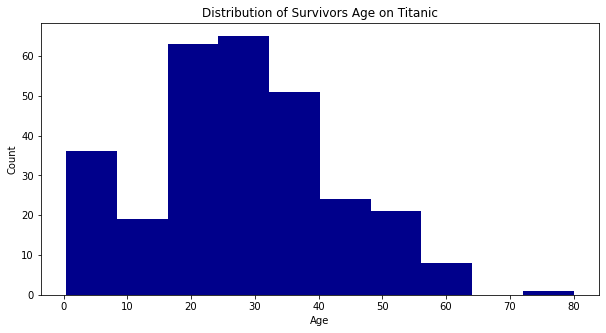

In [64]:
# histogram of embarkation
#2.03-lesson-data-visualization
plt.figure(figsize=(10, 5))

# colors: https://matplotlib.org/3.1.0/gallery/color/named_colors.html
plt.hist(survived['Age'], color='darkblue')

# Create a descriptive title
plt.title('Distribution of Survivors Age on Titanic')

plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [66]:
new_corr=titanic.corr()
new_corr.drop(columns=['PassengerId','IsReverend','CaptainMaybe'],inplace=True)
new_corr.head()

,Survived,Age,SibSp,Parch,Fare,familycount,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
PassengerId,-0.005028,0.033681,-0.057686,-0.001657,0.012703,-0.040258,-0.001208,-0.033694,0.022269,-0.043136,0.043136,0.034511,-0.000086,-0.029601
Survived,1.000000,-0.082446,-0.034040,0.083151,0.255290,0.018277,0.169966,0.004536,-0.151777,0.541585,-0.541585,0.282368,0.095002,-0.320171
Age,-0.082446,1.000000,-0.307351,-0.187896,0.093143,-0.300699,0.038268,-0.021693,-0.025431,-0.099037,0.099037,0.344976,0.009214,-0.309944
SibSp,-0.034040,-0.307351,1.000000,0.414542,0.160887,0.890654,-0.060074,-0.026692,0.069438,0.116348,-0.116348,-0.052894,-0.056507,0.091515
Parch,0.083151,-0.187896,0.414542,1.000000,0.217532,0.782988,-0.011588,-0.081585,0.061512,0.247508,-0.247508,-0.015809,-0.001278,0.014634


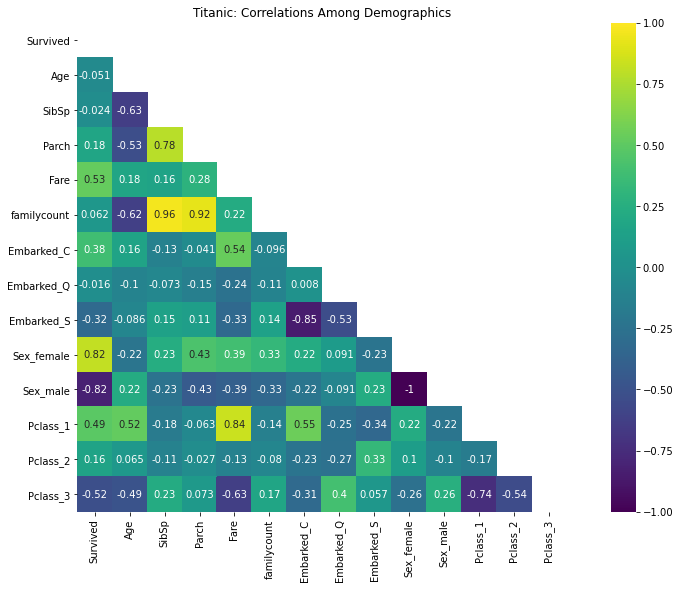

In [90]:
 #This code is taken with minor modifications from
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
# and 2.03-lesson-data-visualization

# Establish size of figure.
plt.figure(figsize=(16,9))

# Get correlation of variables.
corr = new_corr.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
sns.heatmap(corr, annot=True, cmap='viridis', square=True, vmin=-1, vmax=1, mask=mask);


plt.title('Titanic: Correlations Among Demographics');

In [69]:
Cherbourg=(titanic['Embarked_C'].sum())/(titanic['PassengerId'].count())*100
Queenstown=(titanic['Embarked_Q'].sum())/(titanic['PassengerId'].count())*100
Southampton=(titanic['Embarked_S'].sum())/(titanic['PassengerId'].count())*100

In [70]:
Cherbourg, Queenstown, Southampton

(18.89763779527559, 8.661417322834646, 72.44094488188976)

In [71]:
data=[['Cherbourg',18.89],['Queenstown',8.66],['Southampton',72.44]]
Embarked=pd.DataFrame(data, columns=['Port', 'Survival Rate'])

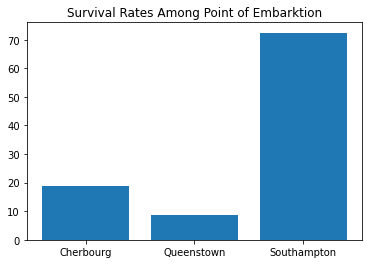

In [72]:
plt.bar(x=Embarked['Port'],height= Embarked['Survival Rate'])
        
plt.title('Survival Rates Among Point of Embarktion');

In [83]:
#creating under 12 class 1
u12_c1=under_12[under_12['Pclass_1']==1]
#formula sum of survived/count of all in the class
First_Class = u12_c1['Survived'].sum()/(u12_c1['Pclass_1'].count())*100

In [84]:
#creating under 12 class 2
u12_c2=under_12[under_12['Pclass_2']==1]
#formula sum of survived/count of all in the class
Second_Class = u12_c2['Survived'].sum()/(u12_c2['Pclass_2'].count())*100

In [85]:
#creating under 12 class 3
u12_c3=under_12[under_12['Pclass_3']==1]
#formula sum of survived/count of all in the class
Third_Class = u12_c3['Survived'].sum()/(u12_c3['Pclass_3'].count())*100

In [87]:
First_Class,Second_Class, Third_Class

(75.0, 100.0, 40.42553191489361)

In [88]:
data=[['First_Class',75.0],['Second_Class',100.0],['Third_Class',40.42]]
Children=pd.DataFrame(data, columns=['Class', 'Survival Rate'])

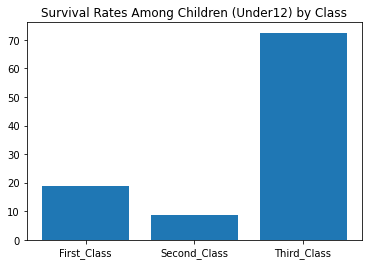

In [89]:
plt.bar(x=Children['Class'],height= Embarked['Survival Rate'])
        
plt.title('Survival Rates Among Children (Under12) by Class');